In [2]:
import pandas
!wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/graphing.py
!wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/doggy-boot-harness.csv
!pip install statsmodels


# Make a dictionary of data for boot sizes
# and harness sizes in cm
data = {
    'boot_size' : [ 39, 38, 37, 39, 38, 35, 37, 36, 35, 40, 
                    40, 36, 38, 39, 42, 42, 36, 36, 35, 41, 
                    42, 38, 37, 35, 40, 36, 35, 39, 41, 37, 
                    35, 41, 39, 41, 42, 42, 36, 37, 37, 39,
                    42, 35, 36, 41, 41, 41, 39, 39, 35, 39
 ],
    'harness_size': [ 58, 58, 52, 58, 57, 52, 55, 53, 49, 54,
                59, 56, 53, 58, 57, 58, 56, 51, 50, 59,
                59, 59, 55, 50, 55, 52, 53, 54, 61, 56,
                55, 60, 57, 56, 61, 58, 53, 57, 57, 55,
                60, 51, 52, 56, 55, 57, 58, 57, 51, 59
                ]
}

# Convert it into a table using pandas
dataset = pandas.DataFrame(data)

# Print the data
# In normal python we would write
# print(dataset)
# but in Jupyter notebooks, we simply write the name
# of the variable and it is printed nicely 
dataset

'wget' is not recognized as an internal or external command,
operable program or batch file.
'wget' is not recognized as an internal or external command,
operable program or batch file.


,boot_size,harness_size
0,39,58
1,38,58
2,37,52
3,39,58
4,38,57
5,35,52
6,37,55
7,36,53
8,35,49
9,40,54


In [4]:
# Load a library to do the hard work for us
import statsmodels.formula.api as smf

# First, we define our formula using a special syntax
# This says that boot_size is explained by harness_size
formula = "boot_size ~ harness_size"

# Create the model, but don't train it yet
model = smf.ols(formula = formula, data = dataset)

# Note that we have created our model but it does not 
# have internal parameters set yet
if not hasattr(model, 'params'):
    print("Model selected but it does not have parameters set. We need to train it!")

Model selected but it does not have parameters set. We need to train it!


In [6]:
# Train (fit) the model so that it creates a line that 
# fits our data. This method does the hard work for
# us. We will look at how this method works in a later unit.
fitted_model = model.fit()

# Print information about our model now it has been fit
print("The following model parameters have been found:\n" +
        f"Line slope: {fitted_model.params[1]}\n"+
        f"Line Intercept: {fitted_model.params[0]}")

The following model parameters have been found:
Line slope: 0.5859254167382707
Line Intercept: 5.719109812682602


C:\Users\User\AppData\Local\Temp\ipykernel_384\3347697885.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f"Line slope: {fitted_model.params[1]}\n"+
C:\Users\User\AppData\Local\Temp\ipykernel_384\3347697885.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f"Line Intercept: {fitted_model.params[0]}")


C:\Users\User\AppData\Local\Temp\ipykernel_384\825871035.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot(dataset["harness_size"], fitted_model.params[1] * dataset["harness_size"] + fitted_model.params[0], 'r', label='Fitted line')


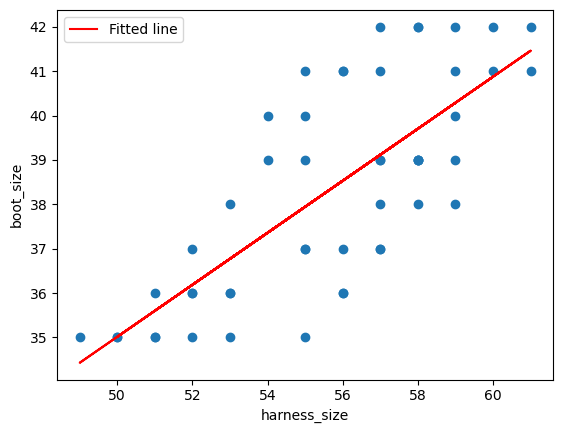

In [8]:
import matplotlib.pyplot as plt

# Show a scatter plot of the data points and add the fitted line
# Don't worry about how this works for now
plt.scatter(dataset["harness_size"], dataset["boot_size"])
plt.plot(dataset["harness_size"], fitted_model.params[1] * dataset["harness_size"] + fitted_model.params[0], 'r', label='Fitted line')

# add labels and legend
plt.xlabel("harness_size")
plt.ylabel("boot_size")
plt.legend()

In [10]:
# harness_size states the size of the harness we are interested in
harness_size = { 'harness_size' : [52.5] }

# Use the model to predict what size of boots the dog will fit
approximate_boot_size = fitted_model.predict(harness_size)

# Print the result
print("Estimated approximate_boot_size:")
print(approximate_boot_size[0])

Estimated approximate_boot_size:
36.48019419144181


In [12]:
# harness_size states the size of the harness we are interested in
harness_size = { 'harness_size' : [60] }

# Use the model to predict what size of boots the dog will fit
approximate_boot_size = fitted_model.predict(harness_size)

# Print the result
print("Estimated approximate_boot_size:")
print(approximate_boot_size[0])

Estimated approximate_boot_size:
40.87463481697885


In [18]:
# harness_size states the size of the harness we are interested in
harness_size = { 'harness_size' : [100] }

# Use the model to predict what size of boots the dog will fit
approximate_boot_size = fitted_model.predict(harness_size)

# Print the result
print("Estimated approximate_boot_size:")
print(approximate_boot_size[0])

Estimated approximate_boot_size:
64.31165148650967
